In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Generate synthetic time series data
import numpy as np
def generate_time_series_data(num_samples, seq_length):
    import numpy as np
    x = np.linspace(0, 10, num_samples)
    y = np.sin(x) + np.random.normal(0, 0.1, num_samples)
    
    X, Y = [], []
    for i in range(len(y) - seq_length):
        X.append(y[i:i + seq_length])
        Y.append(y[i + seq_length])
        
    return np.array(X), np.array(Y)

# Parameters
seq_length = 10
num_samples = 200

# Prepare data
X_raw, Y_raw = generate_time_series_data(num_samples, seq_length)
X_reshaped = X_raw.reshape(X_raw.shape[0], X_raw.shape[1], 1)

# Split data
train_size = int(len(X_reshaped) * 0.8)
X_train, X_test = X_reshaped[:train_size], X_reshaped[train_size:]
Y_train, Y_test = Y_raw[:train_size], Y_raw[train_size:]

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (152, 10, 1)
Testing data shape: (38, 10, 1)


In [3]:

# Build the GRU model
model = Sequential()
model.add(GRU(units=50, return_sequences=False, input_shape=(seq_length, 1)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

C:\Users\Nanditha Sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,001 (31.25 KB)

 Trainable params: 8,001 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - loss: 0.4704 - val_loss: 0.6754
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3389 - val_loss: 0.4329
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.2326 - val_loss: 0.2600
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1453 - val_loss: 0.1373
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0777 - val_loss: 0.0492
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0410 - val_loss: 0.0129
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0359 - val_loss: 0.0125
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0404 - val_loss: 0.0117
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0368 - val_loss: 0.0123
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0320 - val_loss: 0.0150
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0308 - val_loss: 0.0197
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0313 - val_loss: 0.0231


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 656ms/step


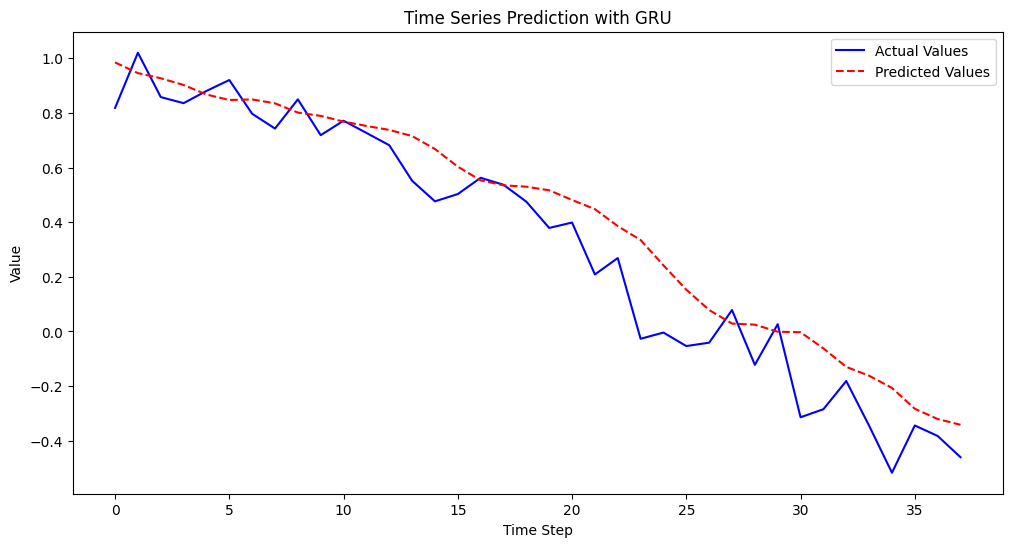

In [4]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual Values', color='blue')
plt.plot(predictions, label='Predicted Values', color='red', linestyle='dashed')
plt.title('Time Series Prediction with GRU')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()